<a href="https://colab.research.google.com/github/D0H00N/DL/blob/main/7_%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터셋 로드

In [105]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())
train_data.shape, test_data.shape

((404, 13), (102, 13))

### 데이터 준비

In [106]:
# 특성별로 정규화

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### 모델 구성

In [107]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])

  model.compile(
      optimizer = "rmsprop",
      loss = "mse",
      metrics = ["mae"])
  return model

### K-폴드 훈련 검증

In [108]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples:],
        train_data[(i + 1) * num_val_samples:]],axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples:],
        train_targets[(i + 1) * num_val_samples:]],axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [109]:
all_scores , np.mean(all_scores)

([1.8468667268753052,
  2.523043394088745,
  2.4814186096191406,
  2.3771791458129883],
 2.307126969099045)

In [110]:
k = 4
num_val_samples = len(train_data) // k

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples:],
        train_data[(i + 1) * num_val_samples:]],axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [111]:
 average_mae_history = [
     np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

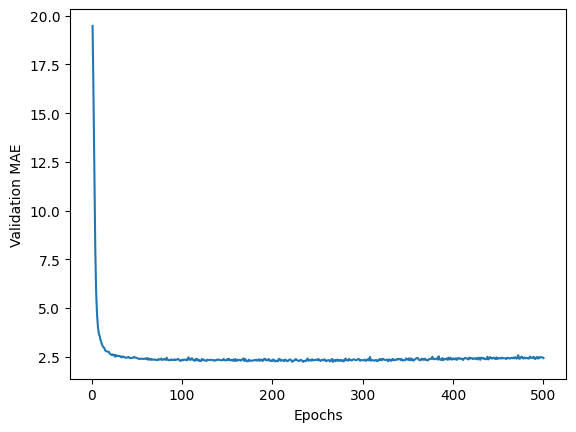

In [112]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

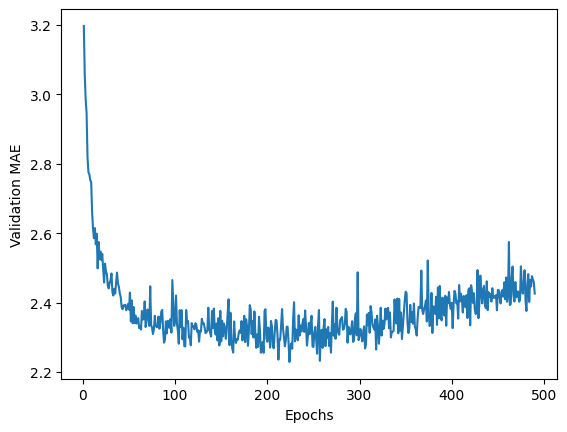

In [113]:
trucated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(trucated_mae_history) + 1), trucated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [114]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.6464 - mae: 2.4499 


In [115]:
test_mae_score

2.642873764038086

In [120]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=200, batch_size=20, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.1451 - mae: 2.3045 


2.446983814239502